In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

<AxesSubplot:xlabel='X', ylabel='Y'>

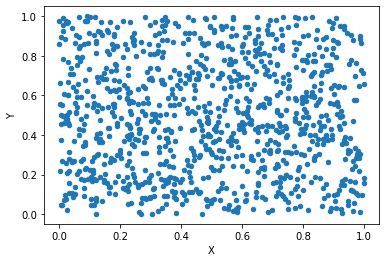

In [6]:
# plotting a K-means for some large no.of datapoints(taking 1000 random values from 0 to 1) to see how the graph looks(as we don't have large dataset,we are creating one here)
X=np.random.uniform(0,1,1000)
Y=np.random.uniform(0,1,1000)
df_xy=pd.DataFrame(columns=["X","Y"])
df_xy.X=X
df_xy.Y=Y
df_xy.plot(x="X",y="Y",kind="scatter")

#### In the above o/p, we couldn't find any similarities or differences that is like patterns as it is scattered everywhere we can't find any relation among the dataset. So, let's apply K-means algorithm.

In [8]:
#X=np.random.uniform(0,1,1000)
#X

<AxesSubplot:xlabel='X', ylabel='Y'>

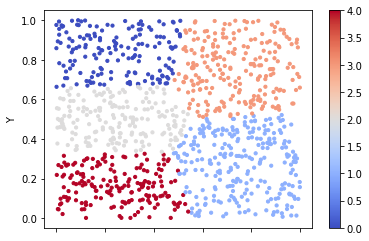

In [12]:
model1=KMeans(n_clusters=5).fit(df_xy)
df_xy.plot(x="X",y="Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

#### In the above code "labels_" denotes cluster membership,here the cluster memberships are 0,1,2,3,4(as we have mentioned n_clusters=5). According to this no.of labels(i.e 5 here) so 5 different colours("c" denotes colours) are considered. "s" denotes size of the dots(i.e 10 here).And for our understanding purpose in order to characterise the clusters, we have mentioned "cmap" to get a scale for the colour coding.

### Implementing the same for the "universities" dataset

In [13]:
univ=pd.read_csv("Universities.csv")

In [14]:
#Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [15]:
#Normalized data frame(considering the numerical part of the data)
df_norm=norm_func(univ.iloc[:,1:])

In [16]:
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


### Elbow Curve(Scree plot)

C:\Users\DHATCHAYINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


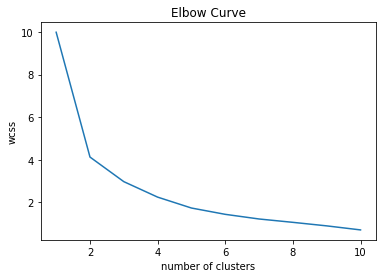

In [18]:
#Inorder to build K-means,we need the best no.of clusters,so for that we are now creating the elbow curve
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss') #within cluster sum of squares distance
plt.show()

#### Let's keep the best value of K=4 which has wccs distance as around 2.25

In [19]:
#selecting 4 clusters from the above scree plot which is the optimum no. of clusters
model=KMeans(n_clusters=4)
model.fit(df_norm)

model.labels_ #getting the labels of the cluster(i.e 0,1,2,3) assigned to each row

array([1, 3, 0, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1])

In [23]:
md=pd.Series(model.labels_) #converting numpy array into pandas series object
univ['clust']=md #creating a new column(which consists of the "clust" values) with the existing original columns
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [25]:
#Identifying the characteristics of the cluster
univ.iloc[:,1:7].groupby(univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1226.666667,74.000,55.666667,14.000,18545.333333,78.333333
1,1278.500000,81.000,34.400000,12.400,25024.500000,91.100000
2,1368.750000,90.625,23.625000,9.375,42375.875000,91.875000
3,1061.500000,38.750,70.000000,19.250,9953.000000,71.750000


#### In the above code, we are grouping the data on the basis of cluster membership column(remaining columns are continous, as "clust" is discrete we are using it to group the data-->as groupby function is for discrete column).
#### From the above o/p, cluster 2 has more graduation rate(91.87) compared to other clusters, also the top 10 percentage is 90.625(which is again more as compared to other clusters), SAT score accepted is also more, and inturn acceptance value is less as the SAT score considered for evaluation is high. So, from this we can conclude that universities which belong to cluster 2 are the best universities(which includes Standford,Harvard,Yale,MIT etc)